# Telco Customer Churn Analysis## Predictive Analytics and Machine Learning using PythonThis notebook is structured for MSc-level coursework. It follows a clear order: data loading, cleaning, EDA, modelling, and interpretation.

## 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

sns.set(style="whitegrid")


## 2. Dataset Loading and Overview

In [5]:
df = pd.read_csv("Telco_Customer_Churn.csv")
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,46,Yes,No,Month-to-month,Mailed check,66.51,3059.46,No
1,Female,0,No,No,15,Yes,Fiber optic,One year,Bank transfer,107.42,1611.30,No
2,Male,1,No,No,25,Yes,Fiber optic,Month-to-month,Bank transfer,40.34,1008.50,No
3,Male,0,Yes,No,71,Yes,Fiber optic,One year,Credit card,32.74,2324.54,No
4,Male,0,Yes,No,17,No,Fiber optic,Two year,Electronic check,48.55,825.35,No


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           500 non-null    object 
 1   SeniorCitizen    500 non-null    int64  
 2   Partner          500 non-null    object 
 3   Dependents       500 non-null    object 
 4   tenure           500 non-null    int64  
 5   PhoneService     500 non-null    object 
 6   InternetService  500 non-null    object 
 7   Contract         500 non-null    object 
 8   PaymentMethod    500 non-null    object 
 9   MonthlyCharges   500 non-null    float64
 10  TotalCharges     500 non-null    float64
 11  Churn            500 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 47.0+ KB


## 3. Data Cleaning and Encoding

In [8]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,46,66.51,3059.46,0,True,True,True,True,False,True,False,False,False,False,True
1,0,15,107.42,1611.30,0,False,False,False,True,True,False,True,False,False,False,False
2,1,25,40.34,1008.50,0,True,False,False,True,True,False,False,False,False,False,False
3,0,71,32.74,2324.54,0,True,True,False,True,True,False,True,False,True,False,False
4,0,17,48.55,825.35,0,True,True,False,False,True,False,False,True,False,True,False


## 4. Exploratory Data Analysis (EDA)

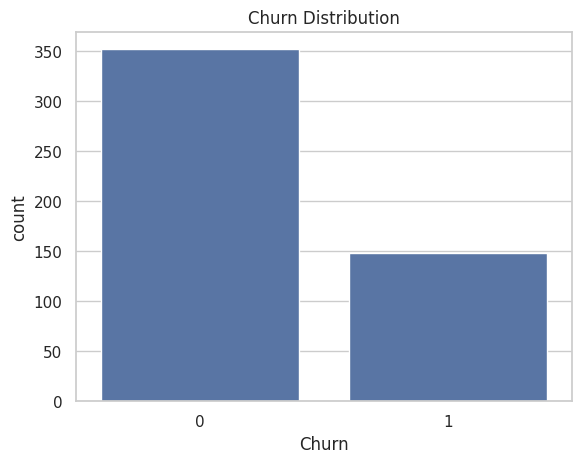

In [9]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


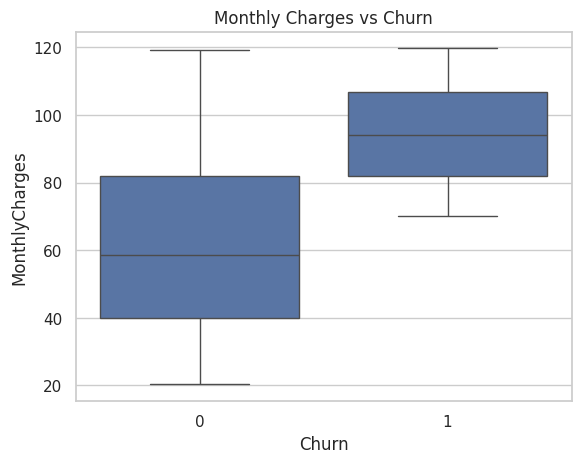

In [10]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


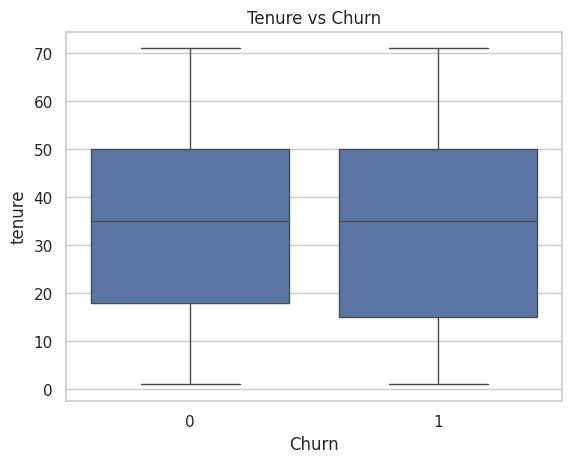

In [11]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


## 5. Train-Test Split

In [13]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 6. Logistic Regression (Classification Model)

In [14]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred_reg = reg_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R2:", r2_score(y_test, y_pred_reg))


MSE: 0.081580643110004
R2: 0.603785123312268


## 7. Regression Model (Churn Probability)

In [15]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred_reg = reg_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R2:", r2_score(y_test, y_pred_reg))


MSE: 0.081580643110004
R2: 0.603785123312268


## 8. K-Means Clustering (Customer Segmentation)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df[["tenure", "MonthlyCharges", "Cluster"]].head()


,tenure,MonthlyCharges,Cluster
0,46,66.51,0
1,15,107.42,1
2,25,40.34,1
3,71,32.74,2
4,17,48.55,1


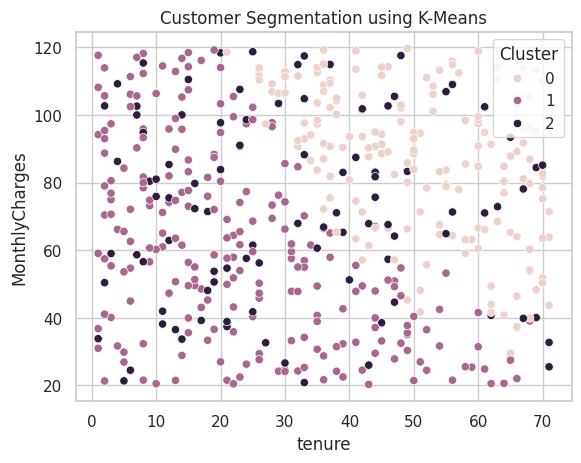

In [17]:
sns.scatterplot(
    x="tenure",
    y="MonthlyCharges",
    hue="Cluster",
    data=df
)
plt.title("Customer Segmentation using K-Means")
plt.show()


## 9. Business Interpretation- Logistic Regression identifies churn drivers.- Regression provides continuous risk scores.- Clustering reveals distinct customer segments for targeted retention.